In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

import os
import glob
import csv
from konlpy.tag import Okt
import re
import numpy
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import set_matplotlib_formats
import pandas as pd 
from sklearn.decomposition import PCA
from wordcloud import WordCloud

mpl.rc('font', family = 'Malgun Gothic')
set_matplotlib_formats('retina')

In [3]:
df = pd.read_csv('jobplanet_review.csv')

In [4]:
df.head()

,Unnamed: 0,기업명,직종,현직원 여부,리뷰 제목,기업 장점,기업 단점,경영진에 바라는 점,기업 성장 가능성
0,0,(주)미래아이엔씨,마케팅/시장조사,현직원,"""기업이 나아가는 방향성이 분명하기 떄문에 비전이 좋습니다.""",자체 기술을 보유하고 있기 떄문에 타 업체 대비 경쟁에서 우위를 점할 수 있어서 편...,아무래 서비스적으로 지원 부분이 많다보니깐 실제로 광고주가 원하는 부분이 많습니다....,지속적인 개발에 힘써 주시는 모습에 감사드리고 앞으로도 좋은 발전 부탁 드립니다.,성장
1,1,(주)미래아이엔씨,디자인,전직원,"""다양한 디자인 포트폴리오를 쌓을 수 있어서 정말 만족\n사람들도 친절하고 좋아요....","자본이 안정되고 오래된 회사, 회사가 망할까봐 두려운것은 절대없어서 좋음\n가끔 조...",포지션에 따라 좋지않을 수도 있는 회사. 청소를 너무 열심히 함\n분위기가 조용해서...,직원들 불만을 잘 수렴해줬으면 함. 업무 포지션 변경이 너무 잦지 않았으면 함.,성장
2,2,(주)미래아이엔씨,영업/제휴,전직원,"""직장 내 괴롭힘과 분위기 조성으로 퇴사 유발하는 그들은, 과연 그들의 자식이 직장...","대부분이 젊은 연령 입니다.\n영업직 한정, 본인이 하는 만큼 벌어갈 수 있습니다....",긴말 않겠습니다. 되도 않는 이유로 사람 꼽주고 정신적 스트레스 줘서 자발적으로 퇴...,"내가 지금 이 사원에게 하는 말, 행동이 부당한지 아닌지 애매하다? 내 자식이 회사...",NaN
3,3,(주)미래아이엔씨,마케팅/시장조사,전직원,"""온라인마케팅을 가장한 TM업무를 동반한 철저한 영업회사.\n더 빨리 퇴사를 못한게...",인센제로 영업력이 뛰어나면 그만큼 월급을 받을 수 있음\n\n당일 퇴사처리\n\n영...,"ㅡ대체휴일 연차소진, 당일연차 사용불가\n하루연차 쓰려해도 3일전에 기안 올려야함\...",월급때문에 퇴사가 늦어졌으나 돌이켜보니 그 버틴 시간들이 너무 아까웠습니다.\n임원...,비슷
4,4,(주)미래아이엔씨,영업/제휴,전직원,"""텔레마케팅 처음경험하기엔 나쁘지않은 회사 오래는 못할거 같음 ..""","건물이 좋음 , 오랜 업력에 입사와 퇴사가 잦음\n텔레마케팅을 처음 겪어보기엔 나쁘...",복지제도가 다양하지만 쓸 시간은 없음\n부담감과 압박이 있음 야근이 잦음,합리적인 복지 및 재투자 지원을 해줬음 좋겠다,비슷


In [5]:
df.isna().sum()

Unnamed: 0       0
기업명              0
직종               0
현직원 여부           0
리뷰 제목            0
기업 장점            0
기업 단점            3
경영진에 바라는 점      43
기업 성장 가능성     9015
dtype: int64

In [6]:
df.drop(columns=["Unnamed: 0"], inplace=True)
df.dropna(inplace=True)

In [7]:
df.head()

,기업명,직종,현직원 여부,리뷰 제목,기업 장점,기업 단점,경영진에 바라는 점,기업 성장 가능성
0,(주)미래아이엔씨,마케팅/시장조사,현직원,"""기업이 나아가는 방향성이 분명하기 떄문에 비전이 좋습니다.""",자체 기술을 보유하고 있기 떄문에 타 업체 대비 경쟁에서 우위를 점할 수 있어서 편...,아무래 서비스적으로 지원 부분이 많다보니깐 실제로 광고주가 원하는 부분이 많습니다....,지속적인 개발에 힘써 주시는 모습에 감사드리고 앞으로도 좋은 발전 부탁 드립니다.,성장
1,(주)미래아이엔씨,디자인,전직원,"""다양한 디자인 포트폴리오를 쌓을 수 있어서 정말 만족\n사람들도 친절하고 좋아요....","자본이 안정되고 오래된 회사, 회사가 망할까봐 두려운것은 절대없어서 좋음\n가끔 조...",포지션에 따라 좋지않을 수도 있는 회사. 청소를 너무 열심히 함\n분위기가 조용해서...,직원들 불만을 잘 수렴해줬으면 함. 업무 포지션 변경이 너무 잦지 않았으면 함.,성장
3,(주)미래아이엔씨,마케팅/시장조사,전직원,"""온라인마케팅을 가장한 TM업무를 동반한 철저한 영업회사.\n더 빨리 퇴사를 못한게...",인센제로 영업력이 뛰어나면 그만큼 월급을 받을 수 있음\n\n당일 퇴사처리\n\n영...,"ㅡ대체휴일 연차소진, 당일연차 사용불가\n하루연차 쓰려해도 3일전에 기안 올려야함\...",월급때문에 퇴사가 늦어졌으나 돌이켜보니 그 버틴 시간들이 너무 아까웠습니다.\n임원...,비슷
4,(주)미래아이엔씨,영업/제휴,전직원,"""텔레마케팅 처음경험하기엔 나쁘지않은 회사 오래는 못할거 같음 ..""","건물이 좋음 , 오랜 업력에 입사와 퇴사가 잦음\n텔레마케팅을 처음 겪어보기엔 나쁘...",복지제도가 다양하지만 쓸 시간은 없음\n부담감과 압박이 있음 야근이 잦음,합리적인 복지 및 재투자 지원을 해줬음 좋겠다,비슷
5,(주)미래아이엔씨,마케팅/시장조사,전직원,"""공고 봤을때 너무나도 기대하고 들어갔어요 유튜브 미래아이앤씨 브이로그도 찾아보고 ...",광고 대행사에 장점은 항상 자유로운 연차인거같아요 이건 좋아요,퇴근 시간이 정해져있지만 해야할일이 너무 많기때문에 강제 야근..,이건 어떤 대행사나 똑같은거라 뭐라 할 말이 없네요 ㅎㅎ,비슷


In [7]:
df['기업 성장 가능성'].value_counts()

비슷    20214
성장     8921
Name: 기업 성장 가능성, dtype: int64

In [11]:
sdf = df.loc[ df['기업 성장 가능성']== '성장' ]
ldf = sdf = df.loc[ df['기업 성장 가능성']== '비슷' ]

In [13]:
sdf

,기업명,직종,현직원 여부,리뷰 제목,기업 장점,기업 단점,경영진에 바라는 점,기업 성장 가능성
3,(주)미래아이엔씨,마케팅/시장조사,전직원,"""온라인마케팅을 가장한 TM업무를 동반한 철저한 영업회사.\n더 빨리 퇴사를 못한게...",인센제로 영업력이 뛰어나면 그만큼 월급을 받을 수 있음\n\n당일 퇴사처리\n\n영...,"ㅡ대체휴일 연차소진, 당일연차 사용불가\n하루연차 쓰려해도 3일전에 기안 올려야함\...",월급때문에 퇴사가 늦어졌으나 돌이켜보니 그 버틴 시간들이 너무 아까웠습니다.\n임원...,비슷
4,(주)미래아이엔씨,영업/제휴,전직원,"""텔레마케팅 처음경험하기엔 나쁘지않은 회사 오래는 못할거 같음 ..""","건물이 좋음 , 오랜 업력에 입사와 퇴사가 잦음\n텔레마케팅을 처음 겪어보기엔 나쁘...",복지제도가 다양하지만 쓸 시간은 없음\n부담감과 압박이 있음 야근이 잦음,합리적인 복지 및 재투자 지원을 해줬음 좋겠다,비슷
5,(주)미래아이엔씨,마케팅/시장조사,전직원,"""공고 봤을때 너무나도 기대하고 들어갔어요 유튜브 미래아이앤씨 브이로그도 찾아보고 ...",광고 대행사에 장점은 항상 자유로운 연차인거같아요 이건 좋아요,퇴근 시간이 정해져있지만 해야할일이 너무 많기때문에 강제 야근..,이건 어떤 대행사나 똑같은거라 뭐라 할 말이 없네요 ㅎㅎ,비슷
6,(주)미래아이엔씨,마케팅/시장조사,전직원,"""처음 입사하면 TM업무를 볼 가능성이 굉장히 높음 면접볼때도 AM업무 관심없냐고 ...",전체적으로 회사사람들이 젊은편에 속한다. 컴퓨터가 pc방급 컴퓨터임,그냥 TM업무를 보는 사람이 대부분이고 역량을 키우거나 스팩을 쌓거나 하기는 좀 무...,사람들이 왜 1년도 못채우고 그만두는지 젊은 사람이 뭐 헝그리정신이 부족하다 이런 ...,비슷
7,(주)미래아이엔씨,영업/제휴,전직원,"""그냥 광고 영업회사이고 광고에 대해서 배울 수 있다는 생각으로 입사할 회사는 아님""",음 장점 ……. 음 뭐가있을까 그냥 앉아서 일 하는거 ? 모든걸 다 혼자해야함 (남...,"영업 압박, 다 혼자해야해서 남한테 가끔 도와달라하는것도 눈치보임, 미팅 나가는 것...",자부심을 갖고 다닐 수 있는 회사로 만들어주길\n자유로운 연차 사용\n재택근무,비슷
...,...,...,...,...,...,...,...,...
38177,대신정보통신(주),IT/인터넷,현직원,"""살인적인 근무강도 바쁠땐 한달에 한번쉬기도 힘든회사 농담이 아닙니다""",프로젝트 구성원에 따라 근무 환경이 좋을수도 있음 때론 이게 단점이 됨,살인적인 근무시간과 개인사생활이 없음 노처녀 노총각이되기 쉬운 회사,다 내려놓고 일할테니 연봉이라도좀 많이 올려주세요..\n사람답게 살고싶습니다..,비슷
38178,대신정보통신(주),IT/인터넷,전직원,"""지역색이 강한 그래도 발전중인 회사입니다.""",공채 사채 차별 없습니다.\n야근 식대 및 부식 지원 후함,일인 오너 및 경영진 중심 회사\n야근 및 주말 근무 수당이 비현실적,늦게까지 일하는 것이 잘하는 것은 아닙니다.,비슷
38180,대신정보통신(주),IT/인터넷,전직원,"""쌍팔년도 스타일의 중견 SI 회사. 주로 사업 제안서만 죽어라 쓰게될 것""",장점을 솔직히 모르겠다.\n연봉? 더 큰회사는 더 많이 줄테니까 장점이 아님\n야근...,"매일 야근, 주말 출근, 회사에 꼰대 밖에 없음\n야근 안하는걸 용납하지 않는 회사...",시대가 바뀌었습니다. 워라벨도 조금만 신경써주세요.\n라이프가 아예 없잖아요,비슷
38187,대신정보통신(주),IT/인터넷,현직원,"""네트워크 관련 유지보수 및 이전 SI사업이 주인 회사입니다.\n\n개발자의 길을 ...",직원수나 매출로는 중견기업이지만 인지도는 강한편.\n실무 경험을 풍부하게 할 수 있...,일부 부서나 경영진이 매우 보수적(퇴근? 눈치껏)\n지방 출장이나 상주가 잦음.\n...,조직문화가 바뀌어야 한다고 생각함. 너무 수직적임.,비슷


In [14]:
sdf[["기업 장점","기업 단점"]].to_csv("성공기업.csv", encoding="utf-8-sig")


In [16]:
ldf[["기업 장점","기업 단점"]].to_csv("비성장기업.csv", encoding="utf-8-sig")


In [21]:

pd.crosstab(df["기업명"], df["기업 성장 가능성"], margins=True).to_csv("기업.csv", encoding="utf-8-sig")


In [10]:
len(df["기업명"].unique())

97

In [13]:
df = pd.read_csv("기업.csv")
pd.DataFrame(df, columns=["기업명","비성장","성장","총합","비성장 비율","성장비율"])

,기업명,비슷,성장,All,비슷.1,성장.1
0,한국방송통신대학교,93,2,95,0.978947,0.021053
1,아시아나아이디티(주),90,7,97,0.927835,0.072165
2,한국피자헛(유),220,20,240,0.916667,0.083333
3,(주)디지틀조선일보,93,9,102,0.911765,0.088235
4,(유)씨앤씨미술교육지원센터,55,6,61,0.901639,0.098361
...,...,...,...,...,...,...
92,한국마이크로소프트(유),202,182,384,0.526042,0.473958
93,한국엠에스디(유),68,65,133,0.511278,0.488722
94,(주)하이컨시,20,26,46,0.434783,0.565217
95,네이버(주),448,689,1137,0.394019,0.605981


In [7]:
df1 = df.loc[[0,1,3,94,95,96],:]


<Figure size 720x288 with 0 Axes>

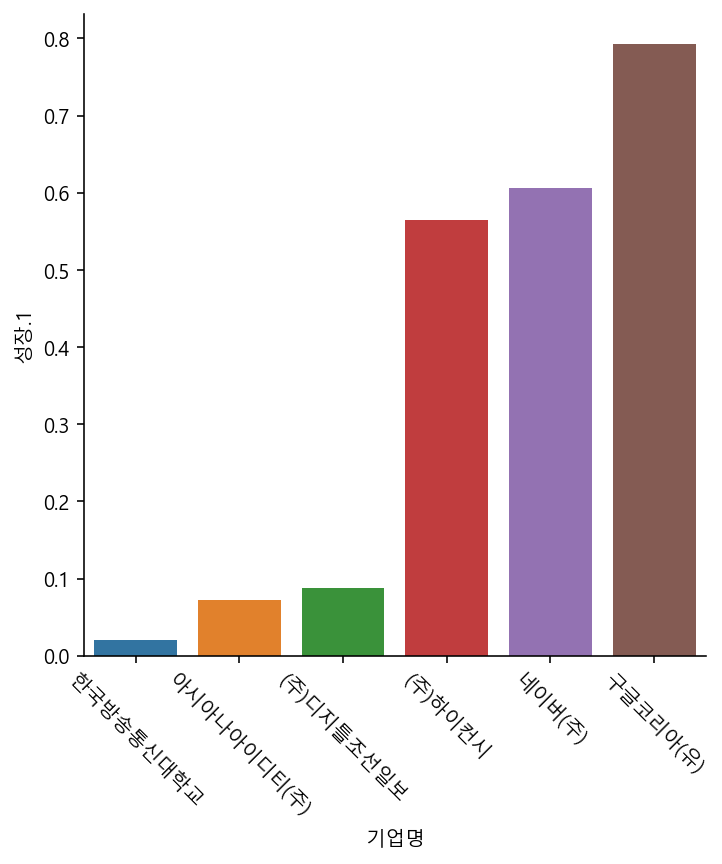

In [9]:
import seaborn as sns 
plt.figure(figsize=(10,4))


sns.catplot(data=df1, x="기업명", y="성장.1", kind="bar")
plt.xticks(rotation = - 45 )

plt.show()

<Figure size 720x288 with 0 Axes>

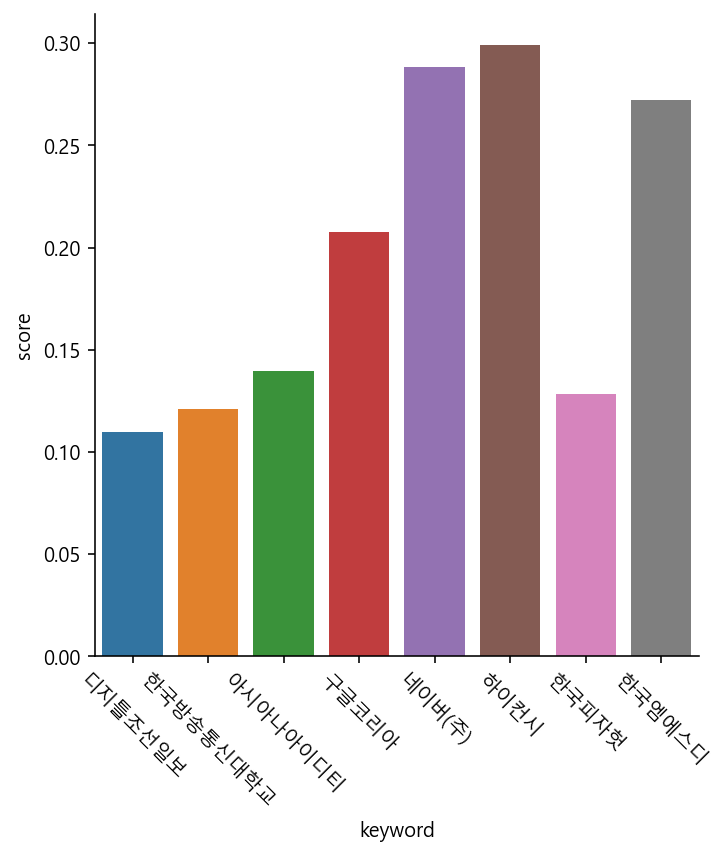

In [34]:
a = pd.read_csv("a.csv")
a.drop(columns = "Unnamed: 0")

import seaborn as sns 
plt.figure(figsize=(10,4))


sns.catplot(data=a, x="keyword", y="score", kind="bar")
plt.xticks(rotation = - 45 )

plt.show()

In [35]:

stats.normaltest( a['score'] )

# 정규분포에 대한 가설 검정
# 귀무가설 : Oxid_time 값이 정규분포를 띌 것이다. 
# 대립가설 : Oxid_time 값이 정규분포를 띄지 않을 것이다. 
# stats.normaltest( df1_table1['Oxid_time'].dropna() )
# P.value < 0.05 , 귀무가설 기각 (대립가설 참)
# Oxid_time 값이 정규분포를 띄지 않을 것이다. 

NormaltestResult(statistic=4.144383154609693, pvalue=0.1259095386242594)

In [29]:
import scipy.stats as stats
cond1 = (a['성장유무']=='성장')
df1_T = a.loc[cond1].dropna()
df1_F = a.loc[~cond1].dropna()
#stats.ranksums(df1_T['score'], df1_F['score'])

stats.ttest_ind(df1_T['score'], df1_F['score'])

Ttest_indResult(statistic=1.661126659101446, pvalue=0.1477534469270301)

In [ ]:
stats.normaltest( df1_table1['Oxid_time'].dropna() )
# 정규분포에 대한 가설 검정
# 귀무가설 : Oxid_time 값이 정규분포를 띌 것이다. 
# 대립가설 : Oxid_time 값이 정규분포를 띄지 않을 것이다. 
stats.normaltest( df1_table1['Oxid_time'].dropna() )
# P.value < 0.05 , 귀무가설 기각 (대립가설 참)
# Oxid_time 값이 정규분포를 띄지 않을 것이다. 
